<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>A2: Modeling Case Study</h2>
<br> Kimberly Batin <br>
<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>



<h2>INTRODUCTION</h2><br>


This study will explore the various determinants of birthweight, a vital factor influencing neonatal health and development. Leveraging a comprehensive dataset, the objective is to determine patterns, identify predictors, and propose actionable insights to mitigate the risks associated with low birthweight. Given the significant correlation between birthweight and neonatal morbidity and mortality, understanding these relationships is crucial. Our methodology encompasses a broad range of computational analytics and machine learning techniques, aimed at explaining the complex interaction between genetic, environmental, and healthcare-related factors. This analysis aims to inform public health strategies, potentially saving lives through early intervention and informed prenatal care.



<h2> Import libraries and preparation </h2>

In [1]:
# installing phik (phi coefficient)
%pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
## Importing libraries ##

# For this template submission
import numpy                 as np                         # mathematical essentials
import pandas                as pd                         # data science essentials
import sklearn.linear_model                                # linear models
from sklearn.model_selection import train_test_split       # train/test split
import matplotlib.pyplot     as plt                        # essential graphical output
import seaborn               as sns                        # enhanced graphical output
import statsmodels.formula.api as smf # predictive modeling with nice outputs
# new libraries
from sklearn.preprocessing   import StandardScaler         # standard scaler
import warnings                                            # warnings from code
from sklearn.tree            import DecisionTreeRegressor  # DecisionTreeRegressor
from sklearn.linear_model    import Ridge, Lasso           # Ridge and Lasso Regression
from sklearn.linear_model    import SGDRegressor           # SGD Regressor
from sklearn.neighbors       import KNeighborsRegressor    # KNN
from sklearn.model_selection import RandomizedSearchCV    
from scipy.stats             import randint
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder           # from Datacamp
from sklearn.metrics import mean_squared_error, r2_score
import warnings                                        # warnings from code
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# classification-specific libraries
import phik                           # phi coefficient
import statsmodels.formula.api as smf # logistic regression
import sklearn.linear_model           # logistic regression

# preprocessing and testing
from sklearn.preprocessing import power_transform    # yeo-johnson
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import (confusion_matrix,
                             roc_auc_score, precision_score, recall_score)

# model results
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix


# machine learning
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# Suppressing warnings
warnings.filterwarnings(action = 'ignore')

# Setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
## Importing data ##

# Reading modeling data into Python
modeling_data = '/Users/kimberly/Downloads/birthweight.xlsx'

# Calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 0,
                         header     = 0,
                         index_col  = 'bwt_id')



# Reading testing data into Python
testing_data = '/Users/kimberly/Downloads/kaggle_test_data.xlsx'

# Calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 0,
                        header     = 0,
                        index_col  = 'bwt_id')

In [4]:
# Concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# Concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)

# Checking data
df_full.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set
bwt_id,,,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle
bwt_2,21,NaN,1,6.0,21.0,NaN,8.0,9.0,NaN,NaN,0,1,0,0,1,0,0,1160.0,Not Kaggle
bwt_3,27,15.0,2,11.0,32.0,16.0,9.0,9.0,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle
bwt_4,33,17.0,1,20.0,39.0,17.0,9.0,10.0,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle
bwt_5,30,15.0,2,12.0,36.0,16.0,9.0,9.0,NaN,NaN,1,1,0,0,1,0,0,3490.0,Not Kaggle


<h2> Base Modeling </h2>

<h3> Data Exploration </h3>

In [5]:
# Get the information for all variables
df_full.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, bwt_1 to bwt_468
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    473 non-null    int64  
 1   meduc   467 non-null    float64
 2   monpre  473 non-null    int64  
 3   npvis   452 non-null    float64
 4   fage    472 non-null    float64
 5   feduc   463 non-null    float64
 6   omaps   471 non-null    float64
 7   fmaps   471 non-null    float64
 8   cigs    440 non-null    float64
 9   drink   441 non-null    float64
 10  male    473 non-null    int64  
 11  mwhte   473 non-null    int64  
 12  mblck   473 non-null    int64  
 13  moth    473 non-null    int64  
 14  fwhte   473 non-null    int64  
 15  fblck   473 non-null    int64  
 16  foth    473 non-null    int64  
 17  bwght   409 non-null    float64
 18  set     473 non-null    object 
dtypes: float64(9), int64(9), object(1)
memory usage: 73.9+ KB


In [6]:
# Get the descriptive stats for the train dataset
df_full.describe().round(decimals = 3)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,473.000,467.000,473.000,452.000,472.000,463.000,471.000,471.000,440.000,441.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,409.00
mean,29.784,13.681,2.205,11.535,32.169,13.866,8.225,8.951,1.173,0.020,0.505,0.871,0.074,0.055,0.877,0.074,0.049,3189.87
std,5.106,2.137,1.330,3.925,6.098,2.222,1.368,0.576,4.212,0.297,0.501,0.336,0.262,0.228,0.328,0.262,0.215,748.45
min,16.000,3.000,0.000,0.000,18.000,6.000,1.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,360.00
25%,26.000,12.000,1.000,10.000,28.000,12.000,8.000,9.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,2780.00
50%,30.000,13.000,2.000,12.000,32.000,14.000,9.000,9.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,3340.00
75%,33.000,16.000,3.000,13.000,36.000,16.000,9.000,9.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,3686.00
max,44.000,17.000,8.000,36.000,62.000,17.000,10.000,10.000,30.000,6.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5089.00


<h3> Dealing with NA values </h3>

In [7]:
# Search for the null values
df_full.isnull().sum(axis = 0)

mage       0
meduc      6
monpre     0
npvis     21
fage       1
feduc     10
omaps      2
fmaps      2
cigs      33
drink     32
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght     64
set        0
dtype: int64

 Mean:   13.680942184154176
 Median: 13.0
 Mode:   0    12.0
Name: meduc, dtype: float64


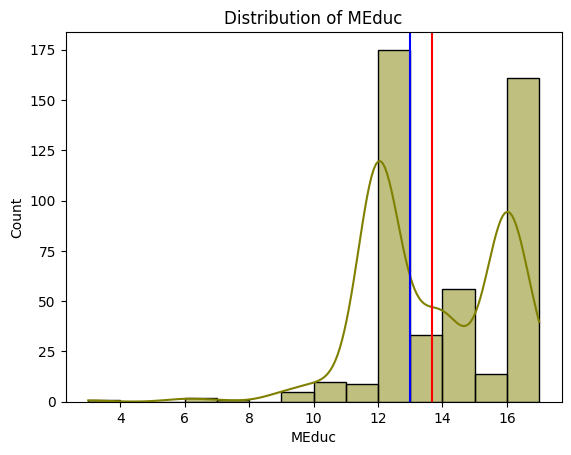

In [8]:
# plotting 'meduc'
sns.histplot(x = 'meduc', # x data
            data = df_full,           # dataset
            color = 'olive',       # color
            kde = True)


# title and labels
plt.title (label  = 'Distribution of MEduc') # title
plt.xlabel(xlabel = 'MEduc')                 # x label
plt.ylabel(ylabel = 'Count')                             # y label

# mean and median lines
plt.axvline(df_full['meduc'].mean()    , color = "red"  ) # redline for mean
plt.axvline(df_full['meduc'].median()  , color = "blue" ) # blue line for median

# checking mean and median results
mean_meduc = df_full['meduc'].mean()
median_meduc = df_full['meduc'].median()
mode_meduc = df_full['meduc'].mode()
print(f""" Mean:   {mean_meduc}""")
print(f""" Median: {median_meduc}""")
print(f""" Mode:   {mode_meduc}""")


# displaying the plot
plt.show()

 Mean:   11.535398230088495
 Median: 12.0
 Mode:   0    12.0
Name: npvis, dtype: float64


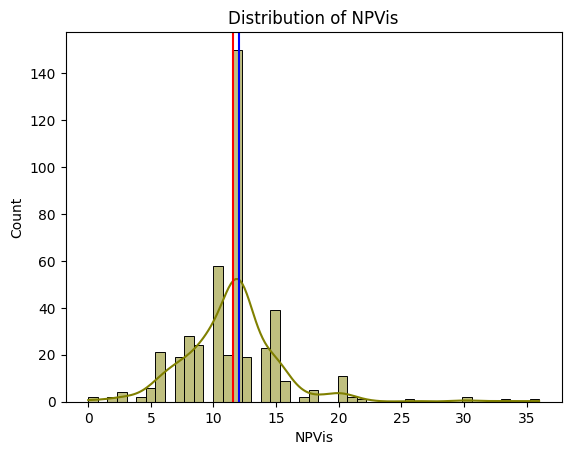

In [9]:
# plotting 'NPVIS'
sns.histplot(x = 'npvis', # x data
            data = df_full,           # dataset
            color = 'olive',       # color
            kde = True)


# title and labels
plt.title (label  = 'Distribution of NPVis') # title
plt.xlabel(xlabel = 'NPVis')                 # x label
plt.ylabel(ylabel = 'Count')                             # y label

# mean and median lines
plt.axvline(df_full['npvis'].mean()    , color = "red"  ) # redline for mean
plt.axvline(df_full['npvis'].median()  , color = "blue" ) # blue line for median

# checking mean and median results
mean_npvis = df_full['npvis'].mean()
median_npvis = df_full['npvis'].median()
mode_npvis = df_full['npvis'].mode()
print(f""" Mean:   {mean_npvis}""")
print(f""" Median: {median_npvis}""")
print(f""" Mode:   {mode_npvis}""")


# displaying the plot
plt.show()

 Mean:   32.16949152542373
 Median: 32.0
 Mode:   0    31.0
1    32.0
Name: fage, dtype: float64


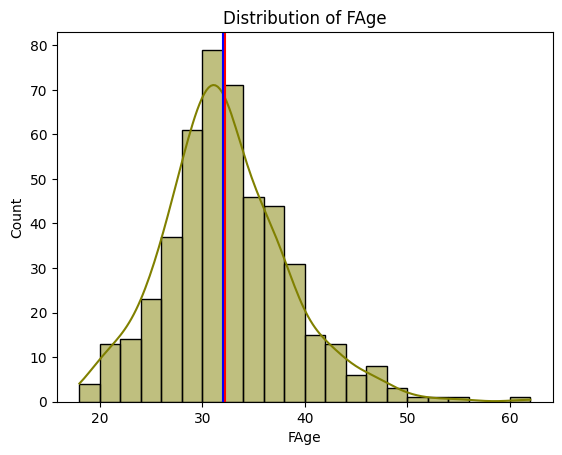

In [10]:
# plotting 'fage'
sns.histplot(x = 'fage', # x data
            data = df_full,           # dataset
            color = 'olive',       # color
            kde = True)


# title and labels
plt.title (label  = 'Distribution of FAge') # title
plt.xlabel(xlabel = 'FAge')                 # x label
plt.ylabel(ylabel = 'Count')                             # y label

# mean and median lines
plt.axvline(df_full['fage'].mean()    , color = "red"  ) # redline for mean
plt.axvline(df_full['fage'].median()  , color = "blue" ) # blue line for median

# checking mean and median results
mean_fage = df_full['fage'].mean()
median_fage = df_full['fage'].median()
mode_fage = df_full['fage'].mode()
print(f""" Mean:   {mean_fage}""")
print(f""" Median: {median_fage}""")
print(f""" Mode:   {mode_fage}""")


# displaying the plot
plt.show()

 Mean:   13.86609071274298
 Median: 14.0
 Mode:   0    12.0
1    16.0
Name: feduc, dtype: float64


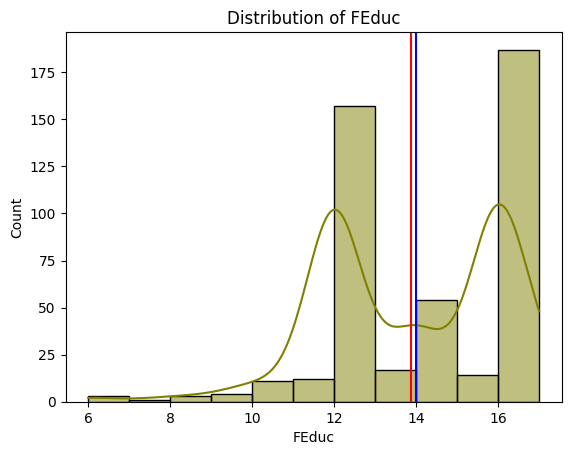

In [11]:
# plotting 'feduc'
sns.histplot(x = 'feduc', # x data
            data = df_full,           # dataset
            color = 'olive',       # color
            kde = True)


# title and labels
plt.title (label  = 'Distribution of FEduc') # title
plt.xlabel(xlabel = 'FEduc')                 # x label
plt.ylabel(ylabel = 'Count')                             # y label

# mean and median lines
plt.axvline(df_full['feduc'].mean()    , color = "red"  ) # redline for mean
plt.axvline(df_full['feduc'].median()  , color = "blue" ) # blue line for median

# checking mean and median results
mean_feduc = df_full['feduc'].mean()
median_feduc = df_full['feduc'].median()
mode_feduc = df_full['feduc'].mode()
print(f""" Mean:   {mean_feduc}""")
print(f""" Median: {median_feduc}""")
print(f""" Mode:   {mode_feduc}""")


# displaying the plot
plt.show()

 Mean:   8.225053078556263
 Median: 9.0
 Mode:   0    9.0
Name: omaps, dtype: float64


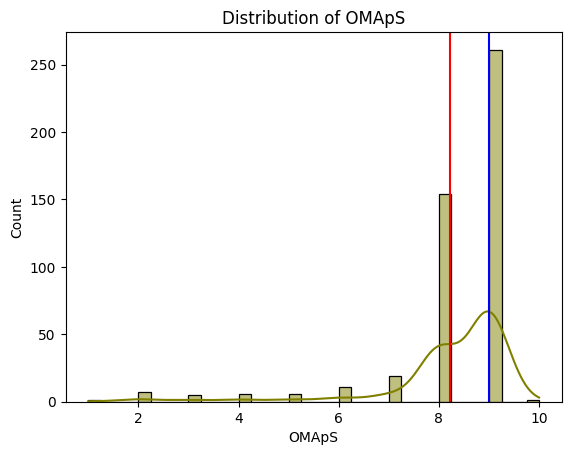

In [12]:
# plotting 'omaps'
sns.histplot(x = 'omaps', # x data
            data = df_full,           # dataset
            color = 'olive',       # color
            kde = True)


# title and labels
plt.title (label  = 'Distribution of OMApS') # title
plt.xlabel(xlabel = 'OMApS')                 # x label
plt.ylabel(ylabel = 'Count')                             # y label

# mean and median lines
plt.axvline(df_full['omaps'].mean()    , color = "red"  ) # redline for mean
plt.axvline(df_full['omaps'].median()  , color = "blue" ) # blue line for median

# checking mean and median results
mean_omaps = df_full['omaps'].mean()
median_omaps = df_full['omaps'].median()
mode_omaps = df_full['omaps'].mode()
print(f""" Mean:   {mean_omaps}""")
print(f""" Median: {median_omaps}""")
print(f""" Mode:   {mode_omaps}""")


# displaying the plot
plt.show()

 Mean:   8.951167728237792
 Median: 9.0
 Mode:   0    9.0
Name: fmaps, dtype: float64


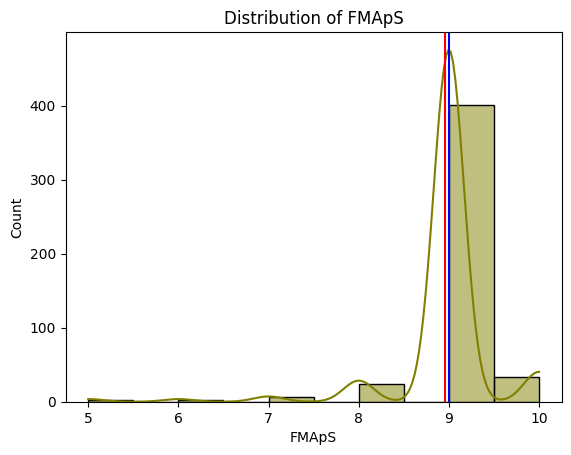

In [13]:
# plotting 'fmaps'
sns.histplot(x = 'fmaps', # x data
            data = df_full,           # dataset
            color = 'olive',       # color
            kde = True)


# title and labels
plt.title (label  = 'Distribution of FMApS') # title
plt.xlabel(xlabel = 'FMApS')                 # x label
plt.ylabel(ylabel = 'Count')                             # y label

# mean and median lines
plt.axvline(df_full['fmaps'].mean()    , color = "red"  ) # redline for mean
plt.axvline(df_full['fmaps'].median()  , color = "blue" ) # blue line for median

# checking mean and median results
mean_fmaps = df_full['fmaps'].mean()
median_fmaps = df_full['fmaps'].median()
mode_fmaps = df_full['fmaps'].mode()
print(f""" Mean:   {mean_fmaps}""")
print(f""" Median: {median_fmaps}""")
print(f""" Mode:   {mode_fmaps}""")


# displaying the plot
plt.show()

 Mean:   1.1727272727272726
 Median: 0.0
 Mode:   0    0.0
Name: cigs, dtype: float64


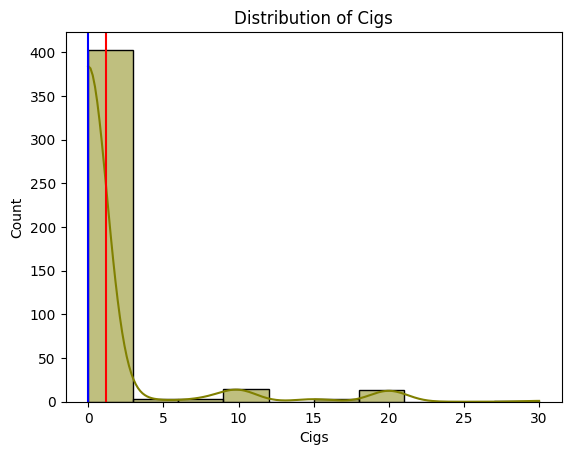

In [14]:
# plotting 'cigs'
sns.histplot(x = 'cigs', # x data
            data = df_full,           # dataset
            color = 'olive',       # color
            kde = True)


# title and labels
plt.title (label  = 'Distribution of Cigs') # title
plt.xlabel(xlabel = 'Cigs')                 # x label
plt.ylabel(ylabel = 'Count')                             # y label

# mean and median lines
plt.axvline(df_full['cigs'].mean()    , color = "red"  ) # redline for mean
plt.axvline(df_full['cigs'].median()  , color = "blue" ) # blue line for median

# checking mean and median results
mean_cigs = df_full['cigs'].mean()
median_cigs = df_full['cigs'].median()
mode_cigs = df_full['cigs'].mode()
print(f""" Mean:   {mean_cigs}""")
print(f""" Median: {median_cigs}""")
print(f""" Mode:   {mode_cigs}""")


# displaying the plot
plt.show()

 Mean:   0.02040816326530612
 Median: 0.0
 Mode:   0    0.0
Name: drink, dtype: float64


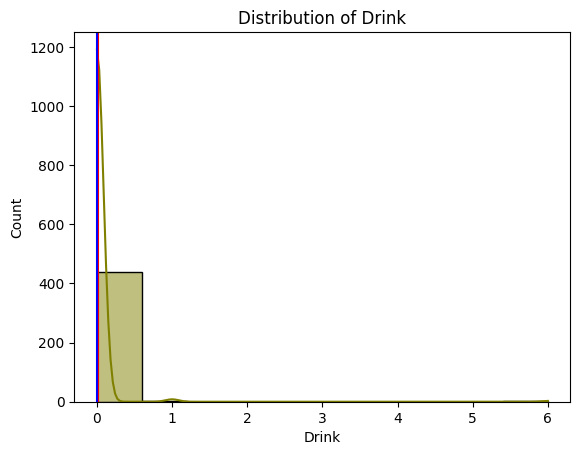

In [15]:
# plotting 'drink'
sns.histplot(x = 'drink', # x data
            data = df_full,           # dataset
            color = 'olive',       # color
            kde = True)


# title and labels
plt.title (label  = 'Distribution of Drink') # title
plt.xlabel(xlabel = 'Drink')                 # x label
plt.ylabel(ylabel = 'Count')                             # y label

# mean and median lines
plt.axvline(df_full['drink'].mean()    , color = "red"  ) # redline for mean
plt.axvline(df_full['drink'].median()  , color = "blue" ) # blue line for median

# checking mean and median results
mean_drink = df_full['drink'].mean()
median_drink = df_full['drink'].median()
mode_drink = df_full['drink'].mode()
print(f""" Mean:   {mean_drink}""")
print(f""" Median: {median_drink}""")
print(f""" Mode:   {mode_drink}""")


# displaying the plot
plt.show()

In [16]:
####### REPLACING #######

mean_list= ['meduc', 'fage', 'feduc']

mode_list=['npvis', 'omaps', 'fmaps', 'cigs', 'drink']

def handle_missing_values(df):
    # Impute missing values with appropriate statistics
    for column in df.columns:
        if df[column].name in mean_list :
            # If numerical, impute missing values with mean
            df[column].fillna(df[column].mean(), inplace=True)
        elif df[column].name in mode_list:
            # If categorical, impute missing values with mode
            df[column].fillna(df[column].mode()[0], inplace=True)

handle_missing_values(df_full)

# checking results
df_full.isnull().sum(axis = 0)

mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght     64
set        0
dtype: int64

<h3> Removing Columns </h3>

In [17]:
# dropping post-event horizon features
df_full = df_full.drop(labels   = ['omaps', 'fmaps'],
                       axis   = 1)

# checking results
df_full.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'set'], dtype='object')

<h3> Visualization </h3>


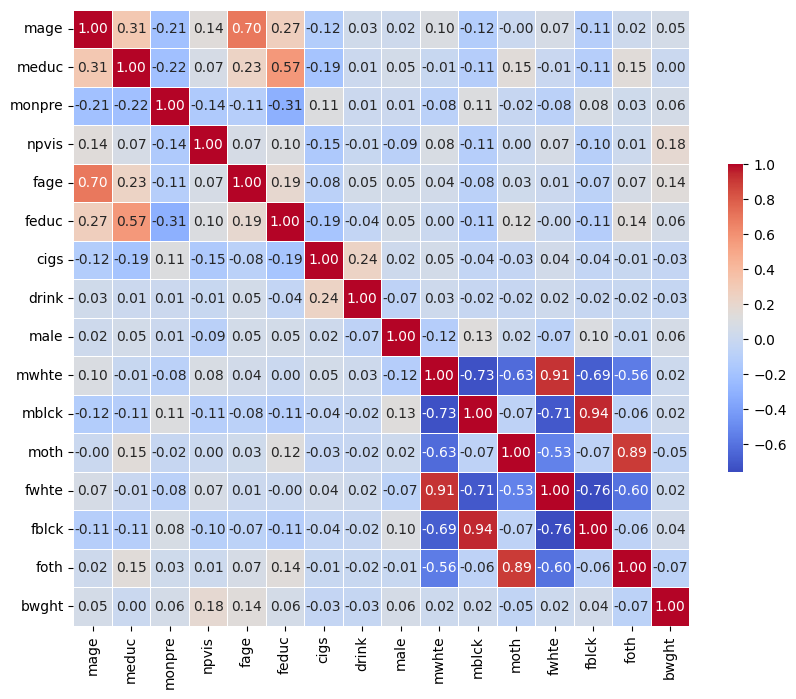

In [18]:
# Create a correlation heatmap to understand the correlations in the dataset

# Select columns with numeric data types
numeric = df_full.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot 
plt.show()

In [19]:
# Select columns with numeric data types
numeric = df_full.select_dtypes(include=[np.number])

# using Pearson correlation
df_corr = numeric.corr(method = 'pearson').round(decimals = 4)


# checking results
df_corr.loc[ : , 'bwght' ].sort_values(ascending = False)

bwght     1.0000
npvis     0.1805
fage      0.1386
male      0.0611
feduc     0.0598
monpre    0.0551
mage      0.0546
fblck     0.0418
mblck     0.0230
fwhte     0.0168
mwhte     0.0154
meduc     0.0013
drink    -0.0255
cigs     -0.0297
moth     -0.0494
foth     -0.0746
Name: bwght, dtype: float64

This heatmap can be helpful in feature selection for predictive modeling. The variables with higher values of correlation with birth weight might be considered more important predictors. There is a positive correlation between the number of prenatal visits (npvis) and birth weight. As the number of prenatal visits increases, birth weight tends to increase. The variables such as mwhte, mblck, fwhte, fblck show weak correlations with birthweight.

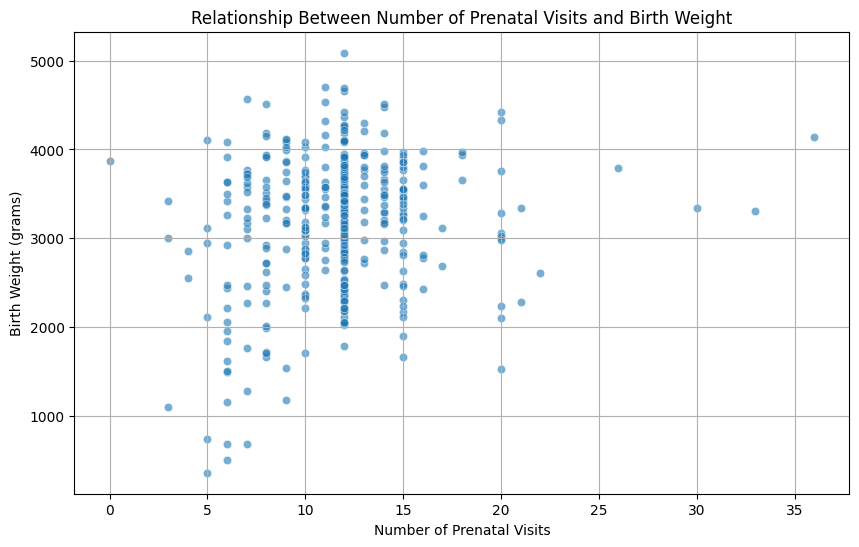

In [20]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='npvis', y='bwght', data=df_full, alpha=0.6)


plt.title('Relationship Between Number of Prenatal Visits and Birth Weight')
plt.xlabel('Number of Prenatal Visits')
plt.ylabel('Birth Weight (grams)')
plt.grid(True)  
plt.show()

The scatter plot is a visual representation of how the number of prenatal visits a mother has during pregnancy might correlate with the birthweight of her baby. The data points represent an individual case within the dataset, plotting the prenatal visits against the baby’s birthweight in grams. It can be seen that a positive correlation would suggest that increased prenatal care is associated with higher birth weights.

Prenatal care can help prevent complications and inform women on how they can protect their infant and ensure a healthy pregnancy. This is for the pregnant women to practice a healthy and safe diet. 

<h2> Feature Engineering </h2>

<h3> Feature 1: Low Birth Weight </h3>

In [21]:
# low birth weight: Yes or No

# Initialize the new column with zeros (assuming 'low_bwght' = 0 means not low birth weight)
df_full['low_bwght'] = 0

# Apply conditions to set 'low_bwght' = 1 based on the given criteria
df_full.loc[(df_full['male'] == 1) & (df_full['bwght'] < 3300), 'low_bwght'] = 1
df_full.loc[(df_full['male'] == 0) & (df_full['bwght'] < 3200), 'low_bwght'] = 1

# Display the updated DataFrame to verify the new feature
#df_full[['male', 'bwght', 'low_bwght']].head()

#df_full['low_bwght'] = (df_full['bwght'] < 2500).astype(int)

In an article, WHO explained that the average birth weight of a full-term male baby is 3.3 kilograms (kg). The average birth weight of a full-term female is 3.2 kg. Babies to lose around 10% of their weight shortly after birth. This decrease is mostly due to fluid loss and most of them gain back this weight within 1 week. It was also mentioned that newborns who are lighter or heavier than the average baby are usually fine. This feature will help determine if the baby has low birth weight or not.

<h3> Feature 2: Lifestyle Risk Score </h3>

In [22]:
df_full['Lifestyle_Risk_Score'] = df_full['cigs'] + df_full['drink']

This aims to quantify lifestyle-related risk factors. It provides a simple yet insightful indicator of potential health risks associated with smoking and alcohol consumption habits. Pregnants who smoke are more likely to have a baby who weighs too low at birth than pregnants who don’t. Smoking, drinking alcohol, using street drugs, and abusing prescription drugs during pregnancy can slow the baby’s growth in the womb and thid can increase the risk for preterm birth and birth defects.

<h3> Feature 3: Teenage Pregnancy </h3>

In [23]:
df_full['teenage_pregnancy'] = (df_full['mage'] < 20).astype(int)

Teenage pregnants are more likely to have low birth weight baby. The risk of delivering low birth weight babies is almost twice as much for pregnants who are younger than 20 years old. It was said that low birth weight was more common in newborns born to adolescent birthing persons than in those born to adult mothers. Infants of teenage births have more risk of poor infant outcomes, that is why prenatal care is essential to the overall health of infants and their mothers. 

<h3> Feature 4: Prenatal Care </h3>

In [24]:
df_full['prenatal_care'] = df_full['monpre'] + df_full['npvis']

Early prenatal care and a higher number of visits are both associated with better pregnancy outcomes. By combining these, the prenatal_care feature summarizes a broader dimension of care accessibility and utilization. This measure serves as an indicator of a pregnant person's access to healthcare services. Accessibility issues, such as location from clinics or hospitals, financial constraints, or lack of awareness, can negatively impact both monpre and npvis. This makes it a valuable substitute for understanding inconsistencies in healthcare access.

<h3> Feature 3: Smokes and Drinks </h3>

In [25]:
df_full['smokes'] = (df_full['cigs'] > 0).astype(int)
df_full['drinks'] = (df_full['drink'] > 0).astype(int)

To simplify the data, cigs and drink where converted to 1, 0. This would be easier to interpret or analyze in throughout the study. The behavior is more significant than the quantity of cigarettes. Such behaviors are often associated with health risks, and making these indicators would be valuable for risk assessment and intervention planning.This can improve the performance of models by providing distinct categories.

<h3> Feature 4: Maternal and Paternal Age </h3>

In [26]:
df_full['parent35'] = ((df_full['fage'] >= 35) | (df_full['mage'] >= 35)).astype(int)

Chung, Hwang, Jung, & Ko(2022), found that paternal age is also significantly associated with low birth weight. Studies revealed  that advanced (>=35) maternal age is a risk factor for many complications in pregnancy. It was observed that some advanced (>=35) paternal age has been associated with genetic mutations, miscarriage, preeclampsia and some birth defects. This feature will also be a help in identifying if the results from the studies vary. In this paper, it will be analyzed if this significantly determine the birth weight of babies.

<h3> Removing Columns </h3>

In [27]:
# dropping post-event horizon features
df_full = df_full.drop(labels   = ['cigs', 'drink'],
                       axis   = 1)

<h2> Transformation and Standardization </h2>

In [28]:
df_full.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'set', 'low_bwght', 'Lifestyle_Risk_Score', 'teenage_pregnancy', 'prenatal_care', 'smokes', 'drinks', 'parent35'], dtype='object')

In [29]:
x_data = df_full[['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 
           'male', 'mwhte', 'mblck', 'moth', 
          'fwhte', 'fblck', 'foth', 'Lifestyle_Risk_Score', 
                  'teenage_pregnancy', 'prenatal_care', 'smokes', 'drinks', 'parent35']]

In [30]:
########################################
# standard_scaler
########################################
def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df



########################################
## visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [31]:
df_full.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'set', 'low_bwght', 'Lifestyle_Risk_Score', 'teenage_pregnancy', 'prenatal_care', 'smokes', 'drinks', 'parent35'], dtype='object')

In [32]:
# creating feature sets
continuous     = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 
                 'bwght', 'Lifestyle_Risk_Score',
                  'prenatal_care' ]

non_continuous = ['male', 'mwhte', 'mblck', 'moth', 'fwhte',
                  'fblck','foth', 'bwght', 'teenage_pregnancy', 'smokes', 'drinks', 'parent35']

# pearson correlation
df_full_corr = df_full[ continuous ].corr(method = 'pearson').round(decimals = 4)


# phi coefficient
df_full_phi_corr = df_full[ non_continuous ].phik_matrix(interval_cols = non_continuous).round(decimals = 4)


# checking results
print(f"""
Point-Biserial Correlations
---------------------------
{df_full_corr.loc[ : , 'bwght' ].sort_values(ascending = False)}


Phi Coefficients
----------------
{df_full_phi_corr.loc[ : , 'bwght' ].sort_values(ascending = False)}
""")


Point-Biserial Correlations
---------------------------
bwght                   1.0000
prenatal_care           0.1982
npvis                   0.1805
fage                    0.1386
feduc                   0.0598
monpre                  0.0551
mage                    0.0546
meduc                   0.0013
Lifestyle_Risk_Score   -0.0309
Name: bwght, dtype: float64


Phi Coefficients
----------------
bwght                1.0000
teenage_pregnancy    0.2047
foth                 0.1277
moth                 0.1086
mwhte                0.1006
fwhte                0.0727
male                 0.0376
mblck                0.0000
fblck                0.0000
smokes               0.0000
drinks               0.0000
parent35             0.0000
Name: bwght, dtype: float64



In [33]:


# Checking skewness of only numeric columns
#x_data_skew = x_data.skew().round(decimals=2)

# subsetting X-data
x_data_skew = df_full.loc[ : , 'Lifestyle_Risk_Score': ]


# checking skewness
x_data.skew().round(decimals = 2)



mage                    -0.01
meduc                   -0.41
monpre                   2.12
npvis                    1.38
fage                     0.65
feduc                   -0.47
male                    -0.02
mwhte                   -2.22
mblck                    3.27
moth                     3.92
fwhte                   -2.31
fblck                    3.27
foth                     4.21
Lifestyle_Risk_Score     4.14
teenage_pregnancy        7.52
prenatal_care            2.07
smokes                   2.95
drinks                  10.77
parent35                 0.68
dtype: float64

In [34]:
# yeo-johnson transformation

# Applying the Yeo-Johnson transformation to the numeric columns
x_transformed = power_transform(X=x_data, method='yeo-johnson', standardize=True)

# Storing results as a DataFrame with the same column names as the numeric data
x_transformed_df = pd.DataFrame(data=x_transformed, columns=x_data.columns)

# Checking skewness results after transformation
x_transformed_skew = x_transformed_df.skew().round(decimals=2)

print(x_transformed_skew)


mage                    -0.02
meduc                   -0.03
monpre                  -0.03
npvis                    0.27
fage                     0.00
feduc                   -0.11
male                    -0.02
mwhte                   -2.22
mblck                    3.27
moth                     3.92
fwhte                   -2.31
fblck                    3.27
foth                     4.21
Lifestyle_Risk_Score     2.90
teenage_pregnancy        7.52
prenatal_care            0.45
smokes                   2.95
drinks                  10.77
parent35                 0.68
dtype: float64


In [35]:
# calculating difference in skew
abs(x_data.skew().round(decimals = 2)) - abs(x_transformed_df.skew().round(decimals = 2))

mage                   -0.01
meduc                   0.38
monpre                  2.09
npvis                   1.11
fage                    0.65
feduc                   0.36
male                    0.00
mwhte                   0.00
mblck                   0.00
moth                    0.00
fwhte                   0.00
fblck                   0.00
foth                    0.00
Lifestyle_Risk_Score    1.24
teenage_pregnancy       0.00
prenatal_care           1.62
smokes                  0.00
drinks                  0.00
parent35                0.00
dtype: float64

In [36]:
# standardizing X-data (st = scaled and transformed)
x_data_st = standard_scaler(df = x_transformed_df)


# checking results
x_data_st.describe(include = 'number').round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,male,mwhte,mblck,moth,fwhte,fblck,foth,Lifestyle_Risk_Score,teenage_pregnancy,prenatal_care,smokes,drinks,parent35
count,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00,473.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.71,-3.65,-4.31,-4.17,-2.90,-2.69,-1.01,-2.60,-0.28,-0.24,-2.67,-0.28,-0.23,-0.31,-0.13,-5.39,-0.31,-0.09,-0.72
25%,-0.74,-0.83,-1.24,-0.36,-0.65,-0.90,-1.01,0.38,-0.28,-0.24,0.37,-0.28,-0.23,-0.31,-0.13,-0.42,-0.31,-0.09,-0.72
50%,0.04,-0.06,0.10,0.17,0.05,-0.02,0.99,0.38,-0.28,-0.24,0.37,-0.28,-0.23,-0.31,-0.13,0.12,-0.31,-0.09,-0.72
75%,0.63,1.13,0.88,0.17,0.69,1.00,0.99,0.38,-0.28,-0.24,0.37,-0.28,-0.23,-0.31,-0.13,0.38,-0.31,-0.09,1.39
max,2.78,1.68,2.54,5.14,3.73,1.57,0.99,0.38,3.54,4.15,0.37,3.54,4.42,3.21,7.62,5.63,3.25,10.83,1.39


<h2> Data Partitioning </h2>

<h3> Assigning Kaggle Data </h3>

In [37]:
# Dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()

# Dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()

# Dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)

# Dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

<h3> Train-Test-Split </h3>

In [38]:
# survival proportions
df.loc[ : ,'low_bwght'].value_counts(normalize = True).round(decimals = 2)

low_bwght
0    0.54
1    0.46
Name: proportion, dtype: float64

In [39]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """low_bwght ~ monpre + npvis +  smokes + 
                                    drinks + male + mwhte + mblck + moth + 
                                    fwhte + fblck + foth +Lifestyle_Risk_Score + 
                                    teenage_pregnancy + prenatal_care + parent35""",
                           data    = df_full)


# fitting the model object
logit_sig = logit_sig.fit()

# checking the results SUMMARY
logit_sig.summary2() # summary2() has AIC and BIC

# """low_bwght ~ mage + meduc + monpre + npvis + fage + feduc + smokes + drinks + male + mwhte + mblck + moth + fwhte + fblck + foth +Lifestyle_Risk_Score + teenage_pregnancy + prenatal_care + parent35"""
# AIC: 637.0908 BIC: 707.7955
# """low_bwght ~ meduc + monpre + npvis + feduc + smokes + drinks + male + mwhte + mblck + moth + fwhte + fblck + foth +Lifestyle_Risk_Score + teenage_pregnancy + prenatal_care + parent35"""
# AIC: 641.1927 BIC: 707.7383
# """low_bwght ~ monpre + npvis + smokes + drinks + male + mwhte + mblck + moth + fwhte + fblck + foth +Lifestyle_Risk_Score + teenage_pregnancy + prenatal_care + parent35"""
# AIC: 635.6445 BIC: 689.7128
# low_bwght ~ Lifestyle_Risk_Score + teenage_pregnancy + prenatal_care + parent35
# AIC: 635.5578 BIC: 656.3533

         Current function value: 0.644445
         Iterations: 35


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                 Logit             Method:            MLE     
Dependent Variable:    low_bwght         Pseudo R-squared:  0.040   
Date:                  2024-04-05 20:07  AIC:               635.6445
No. Observations:      473               BIC:               689.7128
Df Model:              12                Log-Likelihood:    -304.82 
Df Residuals:          460               LL-Null:           -317.42 
Converged:             0.0000            LLR p-value:       0.013913
No. Iterations:        35.0000           Scale:             1.0000  
--------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------
Intercept              0.3711      nan     nan    nan     nan    nan
monpre                -0.0394      nan     nan    nan     nan    nan
npvis                 -0.0067      nan     nan    nan     nan    nan
smokes                 0.5155   0.7003  0.7360 0.4617 -0.8571 1.8881
drinks                 1.4076   1.2022  1.1709 0.2416 -0.9486 3.7638
male                  -0.0030   0.1979 -0.0153 0.9878 -0.3910 0.3849
mwhte                  7.1643      nan     nan    nan     nan    nan
mblck                  8.2444      nan     nan    nan     nan    nan
moth                 -15.0376      nan     nan    nan     nan    nan
fwhte                 -7.2605      nan     nan    nan     nan    nan
fblck                 -8.4353      nan     nan    nan     nan    nan
foth                  16.0670      nan     nan    nan     nan    nan
Lifestyle_Risk_Score  -0.0093   0.0479 -0.1941 0.8461 -0.1031 0.0845
teenage_pregnancy      1.4536   0.8521  1.7058 0.0880 -0.2166 3.1237
prenatal_care         -0.0461      nan     nan    nan     nan    nan
parent35              -0.0476   0.2054 -0.2316 0.8169 -0.4501 0.3550
====================================================================

"""

In [40]:
df_full.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'set', 'low_bwght', 'Lifestyle_Risk_Score', 'teenage_pregnancy', 'prenatal_care', 'smokes', 'drinks', 'parent35'], dtype='object')

In [41]:
x_features   =  df_full[['monpre', 'npvis', 
                  'male',
                 
                 'Lifestyle_Risk_Score', 'teenage_pregnancy', 
                 'prenatal_care','smokes', 'drinks', 'parent35']]
y_variable =  df_full['low_bwght']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            x_features,
            y_variable,
            random_state = 702,
            test_size    = 0.25,
            stratify     = y_variable)

# merging training data for statsmodels
low_train = pd.concat([x_train, y_train], axis = 1)

#x_features   =  df_full[['mage', 'meduc', 'monpre', 'npvis', 'fage', 
 #                'feduc', 'male', 'mwhte', 
 #                'mblck', 'moth', 'fwhte', 'fblck', 'foth', 
 #                'Lifestyle_Risk_Score', 'teenage_pregnancy', 
 #                'prenatal_care','smokes', 'drinks', 'parent35']]

In [42]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
low_bwght
0    0.6
1    0.4
Name: proportion, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
low_bwght
0    0.61
1    0.39
Name: proportion, dtype: float64



In [43]:
#logit_ful= ['npvis',   'cigs', 'drink', 'Lifestyle_Risk_Score']

<h2> Modeling </h2>

<h3> Logistic Regression </h3>

In [44]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                 C = 1,
                                                 random_state = 702)


# FITTING the training data
logreg_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)

# saving scoring data for future use
train_score = round(logreg_fit.score(x_train, y_train), ndigits = 4) # train accuracy
test_score  = round(logreg_fit.score(x_test, y_test),   ndigits = 4) # test accuracy
tt_gap      = round(abs(train_score - test_score),      ndigits = 4) # gap

# displaying and saving the gap between training and testing
print(f"""\
Training ACCURACY: {train_score}
Testing  ACCURACY: {test_score}
Train-Test Gap   : {tt_gap}
""") 

Training ACCURACY: 0.6102
Testing  ACCURACY: 0.6134
Train-Test Gap   : 0.0032



In [45]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 69
False Positives: 3
False Negatives: 43
True Positives : 4



In [46]:
# preparing AUC, precision, and recall
auc       = round(roc_auc_score(y_true = y_test, y_score = logreg_pred) , ndigits = 4)
precision = round(precision_score(y_true = y_test, y_pred = logreg_pred), ndigits = 4)
recall    = round(recall_score(y_true = y_test, y_pred = logreg_pred)   , ndigits = 4)


# dynamically printing metrics
print(f"""\
AUC:       {auc}
Precision: {precision}
Recall:    {recall}
""")

AUC:       0.5217
Precision: 0.5714
Recall:    0.0851



In [47]:
# printing the predicted probabilities of 0 and 1, respectively
pd.DataFrame(data = logreg_fit.predict_proba(x_features).round(decimals = 2),
             columns = ['Class 0', 'Class 1']).head(n = 5)

,Class 0,Class 1
0,0.63,0.37
1,0.60,0.40
2,0.60,0.40
3,0.69,0.31
4,0.59,0.41


In [48]:
# printing actual predictions (0 or 1)
pd.DataFrame(data    = logreg_fit.predict(x_features),
             columns = ['Predicted Class']).head(n = 5)

,Predicted Class
0,0
1,0
2,0
3,0
4,0


<h3> Random Forest </h3>

In [49]:
# INSTANTIATING a random forest model with default hyperparameters
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 702)

In [50]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(rf_default_fit.score(x_train, y_train), ndigits = 4))
print('Testing  ACCURACY:', round(rf_default_fit.score(x_test , y_test ), ndigits = 4))


# saving AUC score
print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = rf_default_fit_pred), ndigits = 4))

Training ACCURACY: 0.8136
Testing  ACCURACY: 0.521
AUC Score        : 0.4749


In [51]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 50
False Positives: 22
False Negatives: 35
True Positives : 12



In [52]:
# instantiating model performance objects
rf_train_acc = round(rf_default_fit.score(x_train, y_train), ndigits = 4)
rf_test_acc  = round(rf_default_fit.score(x_test, y_test)  , ndigits = 4)
rf_auc       = round(roc_auc_score(y_true  = y_test,
                                   y_score = rf_default_fit_pred), ndigits = 4)

conf_mtrx    = tuple([rf_tn, rf_fp, rf_fn, rf_tp])

model_performance = pd.DataFrame()

model_df = pd.DataFrame(data = {'Model Name'         : 'Full Random Forest',
                                'Training Accuracy'  : rf_train_acc,
                                'Testing Accuracy'   : rf_test_acc,
                                'AUC Score'          : rf_auc,
                                'Confusion Matrix'   : str(conf_mtrx)},
                        index = [0])




model_performance = pd.concat(objs         = [model_performance, model_df],
                              axis         = 0,
                              ignore_index = True)

# checking the results
model_performance

,Model Name,Training Accuracy,Testing Accuracy,AUC Score,Confusion Matrix
0,Full Random Forest,0.8136,0.521,0.4749,"(50, 22, 35, 12)"


In [53]:
# instantiating a hyperparameter space
estimator_range  = np.arange(50, 150, 25)
leaf_range       = np.arange(1, 6, 1)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]
max_depth        = np.arange(1, 10, 1)


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range,
              'max_depth'        : max_depth}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 702)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 5,
                               n_iter     = 10,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(x_features, y_variable)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(decimals = 4))

Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': False}
Tuned Training AUC: 0.5385


In [54]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 3,
                                      n_estimators     = 50,
                                      warm_start       = False,
                                      bootstrap        = False,
                                      random_state     = 702)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(x_features, y_variable)


# PREDICTING on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# saving scoring data for future use
forest_tuned_train_score = round(forest_tuned.score(x_train, y_train),
                                 ndigits = 4)

forest_tuned_test_score  = round(forest_tuned.score(x_test , y_test ),
                                 ndigits = 4)


# saving the AUC score
forest_tuned_auc = round(roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred), ndigits = 4)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned_train_score)
print('Forest Tuned Testing  ACCURACY:', forest_tuned_test_score)
print('Forest Tuned AUC Score        :', forest_tuned_auc)

Forest Tuned Training ACCURACY: 0.7373
Forest Tuned Testing  ACCURACY: 0.7647
Forest Tuned AUC Score        : 0.728


In [55]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test,
                               y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 65
False Positives: 7
False Negatives: 21
True Positives : 26



In [56]:
# instantiating model performance objects
tuned_rf_train_acc = round(forest_tuned_fit.score(x_train, y_train),
                           ndigits = 4)

tuned_rf_test_acc  = round(forest_tuned_fit.score(x_test, y_test),
                           ndigits = 4)

tuned_rf_auc       = round(roc_auc_score(y_true  = y_test,
                                         y_score = forest_tuned_pred),
                           ndigits = 4)


conf_mtrx    = tuple([tuned_rf_tn, tuned_rf_fp,
                      tuned_rf_fn, tuned_rf_tp])



# appending to model_performance
model_df = pd.DataFrame(data = {'Model Name'         : 'Tuned Random Forest',
                                'Training Accuracy'  : tuned_rf_train_acc,
                                'Testing Accuracy'   : tuned_rf_test_acc,
                                'AUC Score'          : tuned_rf_auc,
                                'Confusion Matrix'   : str(conf_mtrx)},
                        index = [0])



model_performance = pd.concat(objs         = [model_performance, model_df],
                              axis         = 0,
                              ignore_index = True)


# checking results
model_performance

,Model Name,Training Accuracy,Testing Accuracy,AUC Score,Confusion Matrix
0,Full Random Forest,0.8136,0.5210,0.4749,"(50, 22, 35, 12)"
1,Tuned Random Forest,0.7373,0.7647,0.7280,"(65, 7, 21, 26)"


<h3> Gradient Boosted Machines </h3>

In [57]:
# INSTANTIATING the model object without hyperparameters
full_gbm_def = GradientBoostingClassifier(loss          = 'log_loss',
                                          learning_rate = 0.1,
                                          n_estimators  = 100,
                                          criterion     = 'friedman_mse',
                                          max_depth     = 3,
                                          warm_start    = False,
                                          random_state  = 702)


# FITTING to the training data
full_gbm_def_fit = full_gbm_def.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_def_pred = full_gbm_def_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(full_gbm_def_fit.score(x_train, y_train),
                                  ndigits = 4))
      
print('Testing ACCURACY :', round(full_gbm_def_fit.score(x_test, y_test),
                                  ndigits = 4))
      
print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = full_gbm_def_pred),
                                  ndigits = 4))

Training ACCURACY: 0.7429
Testing ACCURACY : 0.5462
AUC Score        : 0.492


In [58]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, full_gbm_def_pred)

# Print the confusion matrix
print(conf_matrix)

[[54 18]
 [36 11]]


In [59]:
gbm_def_tn, gbm_def_fp, gbm_def_fn, gbm_def_tp = conf_matrix.ravel()

# Now that you have these variables defined, you can proceed with creating your tuple:
conf_mtrx = (gbm_def_tn, gbm_def_fp, gbm_def_fn, gbm_def_tp)


In [60]:
## instantiating model performance objects ##

# training accuracy
gbm_train_acc = round(full_gbm_def_fit.score(x_train, y_train),
                      ndigits = 4)


# testing accuracy
gbm_test_acc  = round(full_gbm_def_fit.score(x_test, y_test),
                      ndigits = 4)


# auc score
gbm_auc       = round(roc_auc_score(y_true  = y_test,
                                    y_score = full_gbm_def_pred),
                      ndigits = 4)


# confusion matrix
conf_mtrx    = tuple([gbm_def_tn, gbm_def_fp,
                      gbm_def_fn, gbm_def_tp])


# appending to model_performance
model_df = pd.DataFrame(data = {'Model Name'         : 'Full GBM',
                                'Training Accuracy'  : gbm_train_acc,
                                'Testing Accuracy'   : gbm_test_acc,
                                'AUC Score'          : gbm_auc,
                                'Confusion Matrix'   : str(conf_mtrx)},
                        index = [0])



model_performance = pd.concat(objs         = [model_performance, model_df],
                              axis         = 0,
                              ignore_index = True)


# checking results
model_performance

,Model Name,Training Accuracy,Testing Accuracy,AUC Score,Confusion Matrix
0,Full Random Forest,0.8136,0.5210,0.4749,"(50, 22, 35, 12)"
1,Tuned Random Forest,0.7373,0.7647,0.7280,"(65, 7, 21, 26)"
2,Full GBM,0.7429,0.5462,0.4920,"(54, 18, 36, 11)"


In [61]:
# instantiating a hyperparameter space
learn_range        = np.arange(0.1, 2.2, 0.5)
estimator_range    = np.arange(50, 301, 50)
depth_range        = np.arange(2, 7, 1)
warm_start_range   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 702)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 10,
                           random_state        = 702,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(x_features, y_variable)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 1.1}
Tuned Training AUC: 0.5433


In [62]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 1.1,
                                       max_depth     = 3,
                                       n_estimators  = 300,
                                       warm_start    = True,
                                       random_state  = 702)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(x_features, y_variable)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(gbm_tuned_fit.score(x_train, y_train),
                                  ndigits = 4))


print('Testing  ACCURACY:', round(gbm_tuned_fit.score(x_test, y_test),
                                  ndigits = 4))


print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = gbm_tuned_pred),
                                  ndigits = 4))


Training ACCURACY: 0.7853
Testing  ACCURACY: 0.7563
AUC Score        : 0.7247


In [63]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 63
False Positives: 9
False Negatives: 20
True Positives : 27



In [64]:
# instantiating model performance objects
gbm_train_acc = round(gbm_tuned_fit.score(x_train, y_train),
                      ndigits = 4)


gbm_test_acc  = round(gbm_tuned_fit.score(x_test, y_test),
                      ndigits = 4)


gbm_auc       = round(roc_auc_score(y_true  = y_test,
                                    y_score = gbm_tuned_pred),
                      ndigits = 4)



conf_mtrx    = tuple([gbm_tuned_tn, gbm_tuned_fp,
                      gbm_tuned_fn, gbm_tuned_tp])


# appending to model_performance
model_df = pd.DataFrame(data = {'Model Name'         : 'Tuned GBM',
                                'Training Accuracy'  : gbm_train_acc,
                                'Testing Accuracy'   : gbm_test_acc,
                                'AUC Score'          : gbm_auc,
                                'Confusion Matrix'   : str(conf_mtrx)},
                        index = [0])



model_performance = pd.concat(objs         = [model_performance, model_df],
                              axis         = 0,
                              ignore_index = True)


# checking the results
model_performance

,Model Name,Training Accuracy,Testing Accuracy,AUC Score,Confusion Matrix
0,Full Random Forest,0.8136,0.5210,0.4749,"(50, 22, 35, 12)"
1,Tuned Random Forest,0.7373,0.7647,0.7280,"(65, 7, 21, 26)"
2,Full GBM,0.7429,0.5462,0.4920,"(54, 18, 36, 11)"
3,Tuned GBM,0.7853,0.7563,0.7247,"(63, 9, 20, 27)"


In [65]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,Training Accuracy,Testing Accuracy,AUC Score,Confusion Matrix
1,Tuned Random Forest,0.7373,0.7647,0.7280,"(65, 7, 21, 26)"
3,Tuned GBM,0.7853,0.7563,0.7247,"(63, 9, 20, 27)"
2,Full GBM,0.7429,0.5462,0.4920,"(54, 18, 36, 11)"
0,Full Random Forest,0.8136,0.5210,0.4749,"(50, 22, 35, 12)"


In [66]:
x_features   =  ['monpre', 'npvis', 
                  'male',
                 'Lifestyle_Risk_Score', 'teenage_pregnancy', 
                 'prenatal_care','smokes', 'drinks', 'parent35']

y_variable =  'low_bwght'

In [67]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()

# y-data
y_data_kaggle = kaggle_data[y_variable]

# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)


# organizing predictions
model_predictions = {"low_bwght" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)

In [68]:
## Kaggle Submission File ##

# sending predictions to .csv
model_pred_df.to_csv(path_or_buf = "/Users/kimberly/Downloads/A2_5.csv",
                     index       = True,
                     index_label = 'bwt_id')

<h2> Analysis </h2>

<h4> Are there any strong positive or strong negative linear (Pearson) correlations with birthweight? Answer this question based on the original, continuous form of birthweight. (minimum 5 sentences) </h4>

There are positive correlations like prenatal visits, father's age, and baby’s gender. This suggests that these factors have a significant association with higher birth weight. On the other hand, negative correlations with behaviors like drinking and smoking suggest these factors are associated with lower birth weight. 

The features in the birth weight data given are not the only factors that correlate with birth weight. There are entries with high prenatal visits but low birth weight. This could be on a different aspect. Is the mother healthy? Is the baby healthy? Why does she have to visit the doctor often?

The parents’ height and weight (which were not given in the dataset) also impact the weight of the baby at birth. It was mentioned that some babies are small because it runs in the family. Another study revealed that a mother's first baby may have a lower birth weight than their second child. This could be because the mother knows more about pregnancy than the first time around.


<h4> Is there an official threshold that signifies when birthweight gets more dangerous? In other words, is there a cutoff point between a healthy birthweight and a non-healthy birthweight? Provide credible sources as necessary. (minimum 5 sentences) </h4>

Years ago, the threshold was for low birth weight is less than 2500 grams. As mentioned in the feature engineer part, WHO explained that the average birth weight of a full-term male baby is 3.3 kilograms (kg). The average birth weight of a full-term female is 3.2 kg. Babies to lose around 10% of their weight shortly after birth. This decrease is mostly due to fluid loss and most of them gain back this weight within 1 week. It was also mentioned that newborns who are lighter or heavier than the average baby are usually fine. If the baby's birth weight is greater than 4000 g or 4500 g, this is Macrosomia.

<h4> After transforming birthweight (bwght) using this threshold, did correlations and/or phi coefficients improve? Why or why not? (minimum 5 sentences) </h4>

The strongest positive correlation is with prenatal_care (0.1982), followed by npvis (0.1805), indicating that higher birth weights are associated with receiving prenatal care and a higher number of prenatal visits. This suggests that interventions aimed at improving prenatal care accessibility and more frequent prenatal visits might positively affect birth weights.

The use of phi coefficients offers a clearer view of the strength of relationships between low and normal birth weight and other binary predictors. The improvement in correlations after transformation depends on the specific variables analyzed and the dataset's characteristics. The binary classification might enhance the ability to determine the impact of maternal health conditions on the likelihood of low birth weight. This can enhance certain aspects of analysis and communication.


<h4> Which two features in your machine learning model had the largest impact on birthweight? Present one actionable insight for each of these. (minimum 5 sentences per feature) </h4>

Based in the researches in this case study, the largest impact on birth weight in the machine learning model are Prenatal Care and Lifestyle Risk Score. 

Increase the availability of prenatal care clinics in some rural and isolated areas to ensure all pregnant women have access to care. Access to quality of prenatal care can significantly impact birth outcomes. Prenatal care is crucial for monitoring and improving maternal and fetal health throughout pregnancy. This is an opportunity for healthcare professionals and even the government to educate expectant mothers on healthy pregnancy practices to check the conditions that can improve birth weight, such as counseling and supplements. Implementing a community-based education programs that inform men and women about sex education or family planning and the importance of early and regular prenatal visits will be beneficial.

Lifestyle risk score negatively correlates with birth weight and highlights the importance of addressing lifestyle factors, such as smoking, drinking, and unhealthy diet, during pregnancy. Reducing these risk behaviors can improve birth outcomes. Develop programs for pregnant women and men identified at high risk due to lifestyle factors. This could include stop-smoking programs, alcohol and substance abuse counseling, and nutritional support services.  Launch public health campaigns aimed at raising awareness about the impacts of unhealthy lifestyle choices during pregnancy on birth weight and overall infant health. Create community support networks that offer emotional and practical support to expectant mothers striving to adopt healthier lifestyles.

<h4> Present your final model's confusion matrix and explain what each error means (false positives and false negatives). Furthermore, explain which error is being controlled for given the cohort's focus on correctly predicting low birthweight, as well as why this error is more important to control than the other error. (minimum 5 sentences) </h4>

Final Model: Random Forest 

The model correctly predicted the negative class 65 times. The model incorrectly predicted the positive class 7 times when it was actually the negative class. The model failed to identify the positive class 21 times, incorrectly predicting them as the negative class. This might be particularly concerning if the positive class is the more critical one to detect accurately. The model correctly identified the positive class 26 times.

The number of False Negatives (21) is concerning,it is critical to detect some entries accurately, like identifying infants at risk of low birth weight. This suggests that while the model performs reasonably well, it might miss identifying a significant number of positive cases, which could have serious implications, the researcher of this case study is aware of this, and will do more research for better results.

Controlling for False Positives is critical. It is based on the potential health implications of not identifying a baby with low birth weight early. Early detection is crucial for ensuring that appropriate care and interventions can be provided to support the infant’s health and development. 

<h4> References: </h4>

Chung, Y. H., Hwang, I. S., Jung, G., & Ko, H. S. (2022). Advanced parental age is an independent risk factor for term low birth weight and Macrosomia. Medicine. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9239628/#:~:text=This%20study%20suggests%20that%20not,low%20birth%20weight%20and%20macrosomia. 

De Pietro. (2023). What is the average baby weight by month?. Medical News Today. https://www.medicalnewstoday.com/articles/325630#by-age 

Low birthweight. March of Dimes. (2021). https://www.marchofdimes.org/find-support/topics/birth/low-birthweight

What is prenatal care and why is it important?. National Institute of Child Health and Human Development. (2017). https://www.nichd.nih.gov/health/topics/pregnancy/conditioninfo/prenatal-care#:~:text=These%20visits%20also%20include%20discussions,any%20questions%20about%20the%20pregnancy.&text=Pre%2DPregnancy%20and%20prenatal%20care,and%20ensure%20a%20healthy%20pregnancy. 